# Creates a cosine similarity matrix of the input representation files



In [42]:
input_dir = '/Users/weale/data/covid/raw/'
tmp_dir = '/Users/weale/data/covid/tmp/'
output_dir = '/Users/weale/data/covid/out/'

experiment = 'comm_use_subset/pdf_json/'

#RUN ONCE PER EXPERIMENT DIRECTORY
#os.makedirs(tmp_dir + experiment)

input_path = input_dir + experiment
tmp_path = tmp_dir + experiment
output_path = output_dir + experiment

In [43]:
from numpy import load

# load array
data = load(output_path + "20200420_title_vectors.npy")

### Create average weighted vectors

There are many ways to turn an array of token vectors into a 'document' vector. In this, we average all the vector elements. Because it's easy and quick.

An open area of experimentation.

In [44]:
import numpy as np
arr_shape = data.shape

newdata = np.zeros((arr_shape[0],arr_shape[2]))

# Transpose the inner parts of the array to average across all token values
for i, arr1 in enumerate(data):
    arr1T = np.transpose(arr1)
    
    for j, arr2 in enumerate(arr1T):
        newdata[i][j] = np.average(arr2)

### Run cosine similarity

We are using the [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html) implementation. This will produce a square *n*x*n* array.

In [45]:
from numpy import asarray
from numpy import save
from sklearn.metrics.pairwise import cosine_similarity

cos_sim = cosine_similarity(newdata)

save(output_path + "20200420_title_cos_sim.npy", cos_sim)

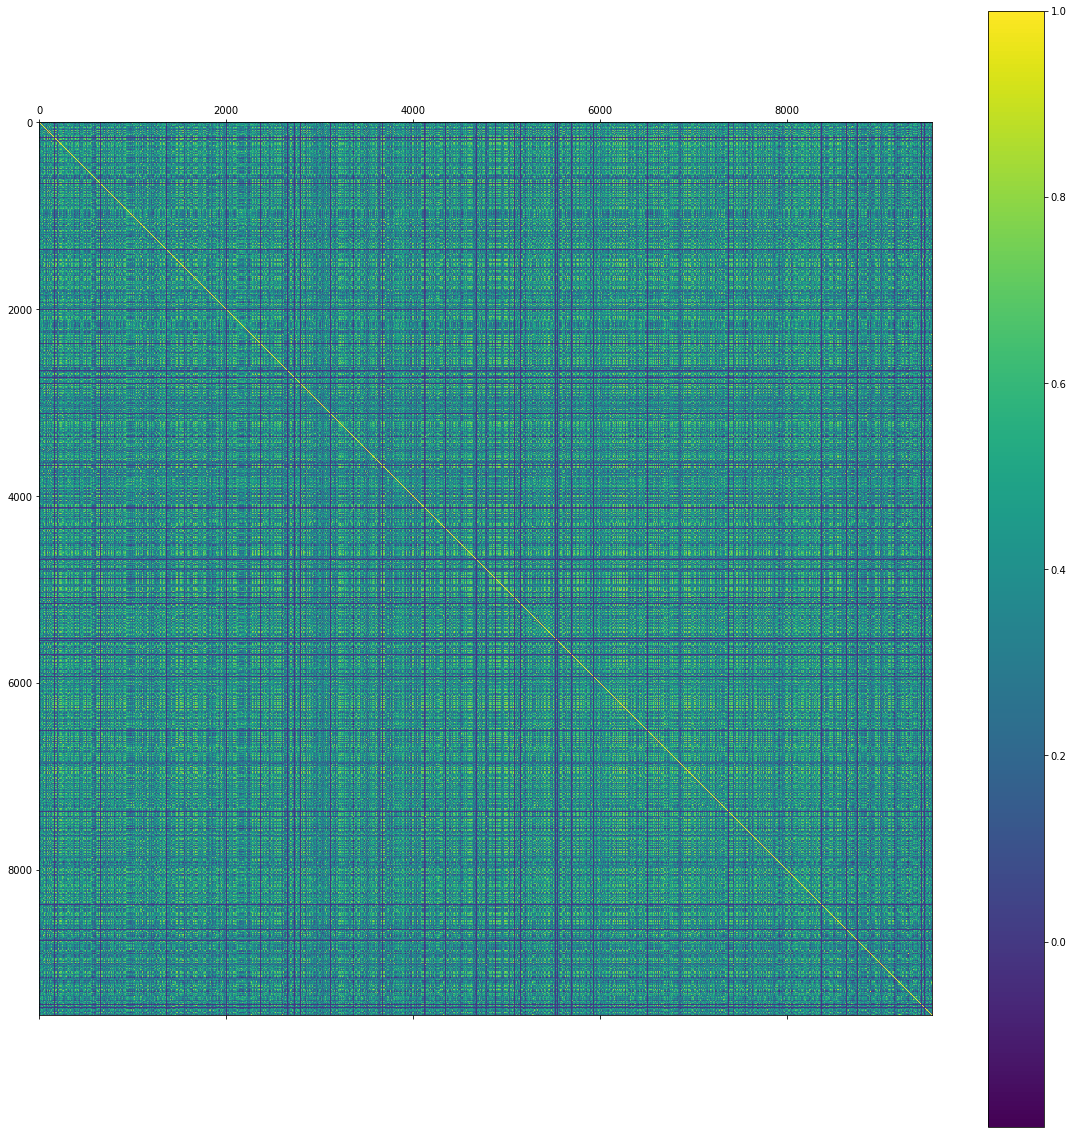

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.matshow(cos_sim, fignum=1)
plt.colorbar()
plt.show()

In [47]:
#ind = np.argpartition(cos_sim, -2, axis=1)

f = open(output_path + "20200420_title_top_ten_index.tsv",'w')
for i in range(len(cos_sim)):
    tmp = cos_sim[i].argsort()[-10:]
    f.write(str(tmp[9]) + '\t' + str(tmp[8]) + '\t' + str(tmp[7]) + '\t' + str(tmp[6]) + '\t' + str(tmp[5]) + '\t' + str(tmp[4]) + '\t' + str(tmp[3]) + '\t' + str(tmp[2]) + '\t' + str(tmp[1]) + '\t' + str(tmp[0]) + '\n')
f.close

#for x in np.nditer(cos_sim):
#    print(np.mean(x))

<function TextIOWrapper.close()>